# Environment Setup

---

### Mount Google Drive folder 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Checkout code and model config

In [2]:
!git clone --branch history https://github.com/hannahg141/ClimateNet.git

Cloning into 'ClimateNet'...
remote: Enumerating objects: 801, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 801 (delta 44), reused 43 (delta 23), pack-reused 734
Receiving objects: 100% (801/801), 15.94 MiB | 38.23 MiB/s, done.
Resolving deltas: 100% (497/497), done.


# Train and evaluate model

Check that GPU is connected.

In [3]:
import torch

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

print("\nCuda is available: "+str(torch.cuda.is_available()))

!nvcc --version

Tue Dec  6 14:20:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    52W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Move dataset to disk.

In [4]:
!mkdir /content/Data
!mkdir /content/Data/train
!mkdir /content/Data/val
!mkdir /content/Data/test
! ls /content/Data/

test  train  val


In [5]:
!cp -r /content/drive/MyDrive/Stanford/CS230/Data/ClimateNet/train/ /content/Data/

In [ ]:
!mv --verbose /content/Data/train/*2008* /content/Data/val/
!mv --verbose /content/Data/train/*2009* /content/Data/val/
!mv --verbose /content/Data/train/*2010* /content/Data/val/

In [ ]:
!cp -r --verbose /content/drive/MyDrive/Stanford/CS230/Data/ClimateNet/test/ /content/Data/

In [ ]:
ls -al /content/Data/train

In [ ]:
!git pull

Move shell to ClimateNet directory.

In [22]:
%cd /content/ClimateNet/

/content/ClimateNet


List models:



In [23]:
!rm config.json
!ls /content/ClimateNet/


baseline    data	image_climatenet.png  print.py	 train_eval.py
climatenet  example.py	models		      README.md


Define training parameters.

In [24]:
import json

# Create the JSON object for config parameters
config = {
    "architecture": "cgnet",
    "seed": 42,
    "lr": 0.001,
    "train_batch_size": 4,
    "pred_batch_size": 8,
    "epochs": 15,
    "fields": {
        "TMQ": {
            "mean": 19.21859,
            "std": 15.81723
        },
        "U850": {
            "mean": 1.55302,
            "std": 8.29764
        },
        "V850": {
            "mean": 0.25413,
            "std": 6.23163
        },
        "PSL": {
            "mean": 100814.414,
            "std": 1461.2227
        }
    },
    "labels": [
      "Background",
      "Tropical Cyclone",
      "Atmospheric River"
    ],
    "loss": "jaccard",
    "description": "Original CGNet model with jaccard loss from the paper."
}

# Write the JSON object to a file in current directory
with open('config.json', 'w') as f:
    json.dump(config, f)

Check training parameters

In [25]:
cat config.json

{"architecture": "cgnet", "seed": 42, "lr": 0.001, "train_batch_size": 4, "pred_batch_size": 8, "epochs": 15, "fields": {"TMQ": {"mean": 19.21859, "std": 15.81723}, "U850": {"mean": 1.55302, "std": 8.29764}, "V850": {"mean": 0.25413, "std": 6.23163}, "PSL": {"mean": 100814.414, "std": 1461.2227}}, "labels": ["Background", "Tropical Cyclone", "Atmospheric River"], "loss": "jaccard", "description": "Original CGNet model with jaccard loss from the paper."}

Launch training and evaluation script!

In [ ]:
!python3 train_eval.py \
-d /content/Data/ \
-m /content/ClimateNet/

# Plot training history

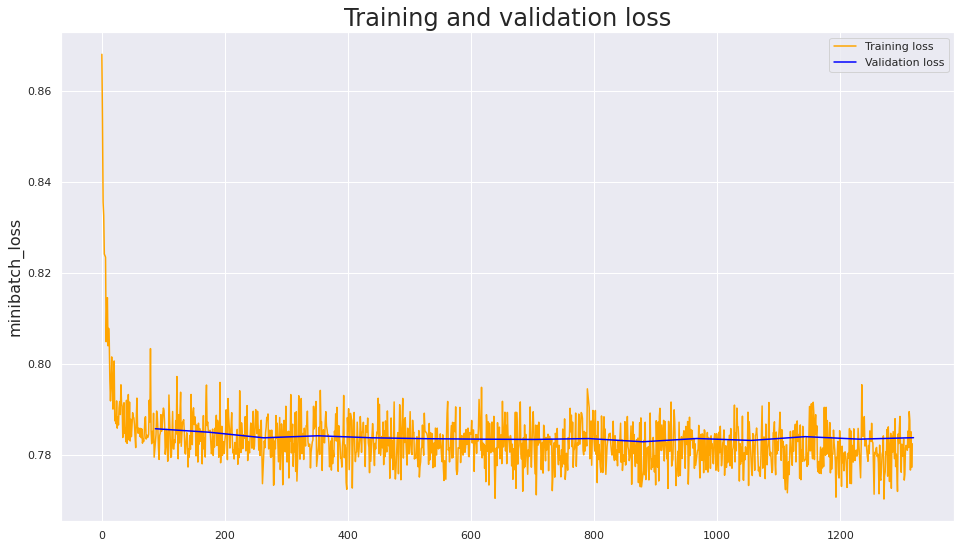

In [49]:
import seaborn as sns
import pandas as pd

# Open training history as a data frame
df = pd.read_csv('history.csv')

# Create the plot with custom colors for the lines
sns.set(rc = {'figure.figsize' : ( 16, 9 ), 
               'axes.labelsize' : 16, 'axes.titlesize' : 24  })
ax = sns.lineplot(x=range(len(df)), y="minibatch_loss", data=df, label="Training loss", color="orange").set(title="Training and validation loss")
ay = sns.lineplot(x=range(len(df)), y="epoch_val_loss", data=df, label="Validation loss", color="blue")


# Save model for future evaluation

In [50]:
!ls -al 

total 4504
drwxr-xr-x 7 root root    4096 Dec  6 14:49 .
drwxr-xr-x 1 root root    4096 Dec  6 14:20 ..
drwxr-xr-x 2 root root    4096 Dec  6 14:20 baseline
drwxr-xr-x 5 root root    4096 Dec  6 14:37 climatenet
-rw-r--r-- 1 root root     703 Dec  6 14:49 config.json
drwxr-xr-x 2 root root    4096 Dec  6 14:20 data
-rw-r--r-- 1 root root    1112 Dec  6 14:20 example.py
drwxr-xr-x 8 root root    4096 Dec  6 14:37 .git
-rw-r--r-- 1 root root   73379 Dec  6 14:49 history.csv
-rw-r--r-- 1 root root 2281680 Dec  6 14:20 image_climatenet.png
drwxr-xr-x 8 root root    4096 Dec  6 14:20 models
-rw-r--r-- 1 root root    1211 Dec  6 14:20 print.py
-rw-r--r-- 1 root root    4814 Dec  6 14:20 README.md
-rw-r--r-- 1 root root    1206 Dec  6 14:20 train_eval.py
-rw-r--r-- 1 root root 2197533 Dec  6 14:49 weights.pth


In [51]:
!ls '/content/drive/MyDrive/Stanford/CS230/Models'

baseline
TMQ-WS850-VRT850-PLS-.001-jl-mb16
TMQ-WS850-VRT850-PLS-PRECT-.0001-jl-mb16
TMQ-WS850-VRT850-PLS-PRECT-.0001-wce
TMQ-WS850-VRT850-PLS-PRECT-.001-jl-mb16
TMQ-WS850-VRT850-PLS-PRECT-.001.wce


In [52]:
!mkdir /content/drive/MyDrive/Stanford/CS230/Models/2022-12-06-001/
!cp config.json '/content/drive/MyDrive/Stanford/CS230/Models/2022-12-06-001/'
!cp weights.pth '/content/drive/MyDrive/Stanford/CS230/Models/2022-12-06-001/'
!cp history.csv '/content/drive/MyDrive/Stanford/CS230/Models/2022-12-06-001/'